## Statystyka i Analiza danych


## Analizowane dane

Analizowany poniżej zbiór danych zawiera informację na temach kursów znajdujących się na platformie Udemy.

Badaną cechą będzie średnia cena kursu.

In [ ]:
Dane <- read.csv("udemy_courses.csv", sep=",")
Dane

## Podstawowa analiza eksploracyjna

In [6]:
badane <- Dane$price

In [7]:
summary(badane)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   20.00   45.00   66.05   95.00  200.00 

In [55]:
dane_w_przedzialach <- cut(badane, breaks=5)
table(dane_w_przedzialach)

dane_w_przedzialach
(-0.2,40]   (40,80]  (80,120] (120,160] (160,200] 
     1793       827       407       172       479 

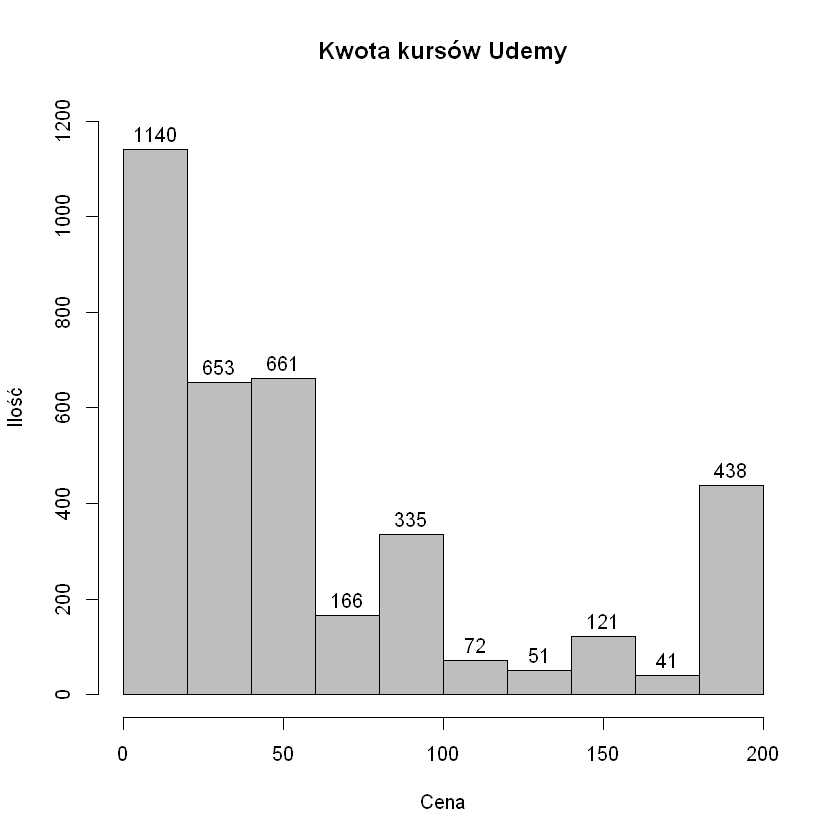

In [31]:
histogram <- hist(badane, main = 'Kwota kursów Udemy', col = 'grey', xlab = 'Cena', ylab = 'Ilość', ylim = c(0,1200))
text(histogram$mids,histogram$counts,labels=histogram$counts, adj=c(0.5, -0.5))

## Statystyki opisowe

In [53]:
skewness <- function(dane){
    c <- 0
    for ( i in 1:length(dane) ){
       c <- c + (dane[i]-mean(dane))**3
       }
    c <- c/length(dane)
    wynik <- c/(sd(dane)**3)
}
dominanta <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}


cat("Ilość danych =",length(badane),"\nŚrednia =",mean(badane),"\nMediana =",median(badane),"\nDominanta =",dominanta(badane))
cat("\nOdchylenie standardowe =",sd(badane),"\nSkośność", skewness(badane))



Ilość danych = 3678 
Średnia = 66.04948 
Mediana = 45 
Dominanta = 20
Odchylenie standardowe = 61.00576 
Skośność 1.158196

### Uzasadnienie i komentarz

- Dostępnych jest 3678 kursów
- Średnia cena wszystkich kursów to 66$

- Wartość środkową zbioru to 45.
- Poszczególne ceny kursów różnią się średnio o 61 od średniej ceny wszystkich kursów.
- Prawoskośność - więcej kursów posiada cenę poniżej średniej
- Dominata wskazuje na to, że najcześciej występują kursy za 20$


## Testowanie hipotezy
Średnia cena kursu to 66$, testując 45 elementową próbę sprawdzimy czy średnia cena kursu jest niższa

In [104]:
dane_test <- sample(badane,45)

In [113]:
srednia <-mean(dane_test)
odchylenie_stand = sd(dane_test)
n <- 45
h_0 <- 66
h_1 <- "< 66"
srednia <- mean(dane_test) 
alfa <- 0.05

cat("n =",n,"\nŚrednia =",srednia,"\nOdchylenie standardowe =",odchylenie_stand,"\nPoziom istostności",alfa,"\n")
cat("Wybieramy test Z\n")
cat ("H_0: μ =", h_0, "\n")
cat("H_1: μ", h_1, "\n")
z_kr <- round(qnorm(1 - alfa), 3)
cat("Wartość krytyczna", z_kr, "\n")
statystyka <- (srednia - h_0)*sqrt(n)/odchylenie_stand
cat("Statystyka", statystyka, "\n")
cat("Obszar krytyczny: ( -inf, ",-z_kr,")\n")
cat("Decyzja: Brak podstaw do odrzucenie H_0. \nBłąd drugiego rodzaju")

n = 45 
Średnia = 63.88889 
Odchylenie standardowe = 59.48538 
Poziom istostności 0.05 
Wybieramy test Z
H_0: µ = 66 
H_1: µ < 66 
Wartość krytyczna 1.645 
Statystyka -0.2380713 
Obszar krytyczny: ( -inf,  -1.645 )
Decyzja: Brak podstaw do odrzucenie H_0. 
Błąd drugiego rodzaju